<a href="https://colab.research.google.com/github/akshatjaiin/woman-safety-gem-/blob/main/WomanSafety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mix of ais to detect the crime early and call the sos for help for womanSafety

**Installing needed modules**

In [ ]:
!pip install opencv-python numpy

**The below cell is for capturing img just for colab so we can directly use our camera over here**


In [59]:
from IPython.display import display, Javascript , clear_output ,Image;
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def startVideo():
  js = Javascript('''
  async function startVideo() {
      // Create video element
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      div.appendChild(video);
      document.body.appendChild(div);

      // Get webcam video stream
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      video.id = "cameravideo"
      await video.play();
      window.videoId = video.id;
      // Resize output to fit video element
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      video.style.display="none";
      return video.id;
    }
    function getFrame () {
          const video = document.getElementById(window.videoId);
          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          const context = canvas.getContext('2d');
          context.drawImage(video, 0, 0, canvas.width, canvas.height);
          return canvas.toDataURL('image/jpeg', 0.8);
        }
    ''')
  display(js);
  eval_js('startVideo()');
def takePicture(quality=0.8):
  data = eval_js(f'getFrame({quality})');
  binary = b64decode(data.split(',')[1]);
  image_array = np.frombuffer(binary, dtype=np.uint8);
  image = cv2.imdecode(image_array, cv2.IMREAD_COLOR);
  return binary,image;

<IPython.core.display.Javascript object>

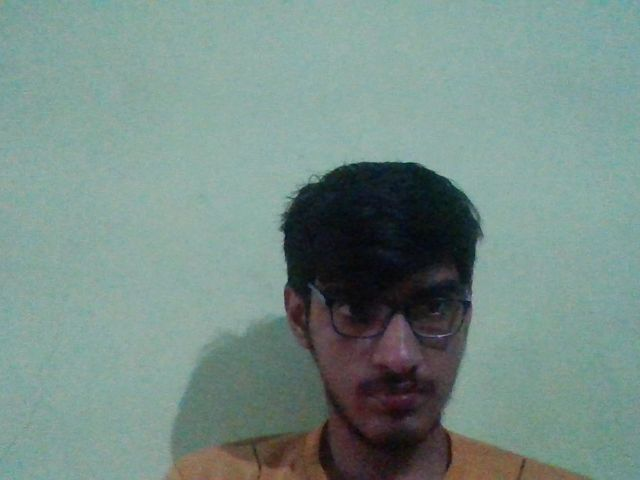

In [60]:
import time
video = startVideo();
bin,img = takePicture();
for i in range(60*20):
  clear_output();
  display(Image(bin))
  time.sleep(0.016);

In [ ]:
def camera():
  video = cv2.VideoCapture(0);
  if(not video.isOpened): raise Exception("Sorry no video input found");
  return video;

In [ ]:
video = camera();
video.isOpened()

In [ ]:
while video.isOpened():
  ret,frame = video.read();
  if(not ret):
    print("camera not working");
    continue;
  if cv2.waitKey(25) & 0xFF == ord('q'):
            break